# Spectrum Spatial Python Package 
<p>The <b><code>spectrumspatialpy</code></b> package provides Python integration for the Spectrum Spatial services such as the Feature Service for querying spatial data. This notebook will walk through instantiating a <code>SpatialServer</code> object and describe and demonstrate the services that it exposes.</p>
<br/><br/>
<hr/>
<blockquote>
<p>Copyright 2019 Pitney Bowes Inc.</p>

<p>Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License.  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0 

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.  See the License for the specific language governing permissions and limitations under the License.
</p>
</blockquote>

###### Setup and Prerequisites

<p>Prerequisites are desicribed in the <code>Spectrum Python Setup</code> notebook.</p>
<p>Before using <code>spectrumspatialpy</code>, the <code>spectrumpy</code> package must be imported and a server instantiated as follows.</p>

In [1]:
import spectrumpy
myServer=spectrumpy.Servers.getServer('localhost')

###### Instantiating a Spectrum Spatial service
A Spectrum Spatial service is instantiated using an established Spectrum server object. For example,

In [2]:
import spectrumspatialpy
mySpectrumSpatial=spectrumspatialpy.SpatialServer(myServer)

<br/>
<br/>
<br/>

### SpatialServer Object
<p>There are several service objects that are accessible off the main Spectrum Spatial object (<code>mySpectrumSpatial</code>).</p>

  * <code>mySpectrumSpatial.FeatureService()</code> : Returns the <b>Feature Service</b> for this server.
  * <code>mySpectrumSpatial.GeometryOperations()</code> : Returns the <b>Geometry Service</b> for this server. This does not correspond to the LIM Geometry service; rather, it exposes a method for converting a GeoJSON FeatureCollection to a GeoPandas GeoDataFrame.
  * <code>mySpectrumSpatial.NamedResourceService()</code> : Returns the <b>Named Resource Service</b> for this server.
  * <code>mySpectrumSpatial.Thematics()</code> : Returns the <b>Thematics Service</b> for this server. This does not correspond to a LIM service, it was created to contain some methods that are specifically designed to output a theme from Python into the repository. There will be an example below.
  

<hr/>

# <u>Spatial Data Access</u>

<hr/>

<p>The following section uses the Feature Service to list the available tables, define their schemas, and perform MISQL queries.</p>

### Feature Service
The <code>FeatureService</code> exposes several methods represented by the LIM <a href="http://support.pb.com/help/spectrum/18.2/en/webhelp/Spatial/index.html#Spatial/source/Development/devguide/rest/feature.html">FeatureService</a>.

  * listTables() : Prints to the output the available named tables at the server
  * describeTable(tablePath) : Prints to the output a description of the table
  * query() : Accepts an MISQL query and returns a GeoJSON FeatureCollection
  * get() : Exposes a way to issue an arbitrary request against the Feature Service
    

In [3]:
ftrService = mySpectrumSpatial.FeatureService()
ftrService.listTables()

['/Cary/BatchProcess/Catchments',
 '/Cary/BatchProcess/DangerArea_Chicago',
 '/Cary/BatchProcess/GeocodedCustomers',
 '/Cary/BatchProcess/Routes',
 '/Cary/Mecklenburg/BOCC',
 '/Cary/Mecklenburg/Buildings',
 '/Cary/Mecklenburg/Impervious_Surface_Other',
 '/Cary/Mecklenburg/Jurisdictions',
 '/Cary/Mecklenburg/MAT',
 '/Cary/Mecklenburg/Meck_CountyBoundary_20104326',
 '/Cary/Mecklenburg/Parcel_NoData',
 '/Cary/Mecklenburg/ParkParcels',
 '/Cary/Mecklenburg/Singlefamily_Impervious',
 '/Cary/Mecklenburg/TaxEasements',
 '/Cary/Mecklenburg/Zoning_Charlotte',
 '/Cary/Mecklenburg/streets4326',
 '/Cary/PB/Address Fabric/CAN_AddressFabric_201809',
 '/Cary/PB/Address Fabric/US_AddressFabric',
 '/Cary/PB/Demographics/Demographics/Groundview Family Demographics 2000',
 '/Cary/PB/Demographics/Demographics/Groundview Family Demographics 2010',
 '/Cary/PB/Demographics/Demographics/Groundview Family Demographics 2018',
 '/Cary/PB/Parcels/Parcels',
 '/Cary/PB/StreetPro NAV Premium/usa_nodes',
 '/Cary/PB/St

In [4]:
ftrService.describeTable("/Samples/NamedTables/USA")

TABLE:/Samples/NamedTables/USA
------------------------------------------------------------------------------------
Obj                     	Geometry
MI_Style                	Style
State_Name              	String
State                   	String
Fips_Code               	String
Pop_1990                	Decimal	 (10,0)
Pop_2000                	Decimal	 (10,0)
Num_Hh_1990             	Decimal	 (10,0)
Num_Hh_2000             	Integer
Med_Inc_1990            	Decimal	 (10,0)
Med_Inc_2000            	Double
Pop_Urban_2000          	Integer
Pop_Rural_2000          	Integer
Pop_Male                	Decimal	 (10,0)
Pop_Female              	Decimal	 (10,0)
Pop_Cauc                	Decimal	 (10,0)
Pop_Black               	Decimal	 (10,0)
Pop_Native              	Decimal	 (10,0)
Pop_Asian               	Decimal	 (10,0)
Pop_Other               	Decimal	 (10,0)
Sales_1990              	Decimal	 (10,0)
AmerIndianAlaskaNat_2000	Decimal	 (10,0)
AsianHawaiianAlone_2000 	Decimal	 (10,0)
Pop_Black_2000    

###### MISQL Query
The query method accepts an <a href="http://support.pb.com/help/spectrum/18.2/en/webhelp/Spatial/index.html#Spatial/source/misql/misqlapiguide/index/function_index.html">MISQL</a> query and returns a GeoJSON FeatureCollection. The following example returns all features from the USA sample dataset whose state name begins with 'N' and prints out some results. Note we return only the centroid of the state geometry only for the purposes of showing a geometry without generating too much output.

In [5]:
query = "select State_Name, State, Fips_Code, Pop_1990, Pop_2000, MI_Centroid(OBJ) " \
    "from \"/Samples/NamedTables/USA\" " \
    "where State_Name LIKE 'N%'"
states = ftrService.query(query)
print(states)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'State_Name': 'Nebraska', 'State': 'NE', 'Fips_Code': '31', 'Pop_1990': 1578385.0, 'Pop_2000': 1711263.0}, 'geometry': {'type': 'Point', 'coordinates': [-99.680521, 41.50087]}, 'id': 28}, {'type': 'Feature', 'properties': {'State_Name': 'Nevada', 'State': 'NV', 'Fips_Code': '32', 'Pop_1990': 1201833.0, 'Pop_2000': 1998257.0}, 'geometry': {'type': 'Point', 'coordinates': [-117.021761, 38.502190999999996]}, 'id': 29}, {'type': 'Feature', 'properties': {'State_Name': 'New Hampshire', 'State': 'NH', 'Fips_Code': '33', 'Pop_1990': 1109252.0, 'Pop_2000': 1235786.0}, 'geometry': {'type': 'Point', 'coordinates': [-71.63089099999999, 44.001070999999996]}, 'id': 30}, {'type': 'Feature', 'properties': {'State_Name': 'New Jersey', 'State': 'NJ', 'Fips_Code': '34', 'Pop_1990': 7730188.0, 'Pop_2000': 8414350.0}, 'geometry': {'type': 'Point', 'coordinates': [-74.7271, 40.142868]}, 'id': 31}, {'type': 'Feature', 'properties'

In [6]:
# Iterate through the individual features and properties to display some output
features = states["features"]
for i in range(len(features)):
    properties = features[i]["properties"]
    print (properties["State_Name"], end='')
    print ("\t", end='')
    print (properties["State"], end='')
    print ("\t", end='')
    print (properties["Fips_Code"], end='')
    print ("\t", end='')
    print (str(properties["Pop_1990"]), end='')
    print ("\t", end='')
    print (str(properties["Pop_2000"]), end='')
    print ("\t", end='')
    print (str(features[i]["geometry"]['coordinates'][0]), end='')
    print (",", end='')
    print (str(features[i]["geometry"]['coordinates'][1]), end='')
    print ("")

Nebraska	NE	31	1578385.0	1711263.0	-99.680521,41.50087
Nevada	NV	32	1201833.0	1998257.0	-117.021761,38.502190999999996
New Hampshire	NH	33	1109252.0	1235786.0	-71.63089099999999,44.001070999999996
New Jersey	NJ	34	7730188.0	8414350.0	-74.7271,40.142868
New Mexico	NM	35	1515069.0	1819046.0	-106.02552,34.16617
New York	NY	36	17990455.0	18976457.0	-76.502057,42.856215999999996
North Carolina	NC	37	6628637.0	8049313.0	-80.018692,35.213817
North Dakota	ND	38	638800.0	642200.0	-100.30129099999999,47.46788


<hr/>

# <u>Combining Geocoding, Routing and Spatial</u>

<hr/>

The <code>spectrumpy</code> and <code>spectrumspatialpy</code> packages allow integrated use of any Spectrum capabilities exposed by the server. This example below will combine <b>Geocoding</b>, <b>Routing</b>, and <b>Spatial</b> to produce an elevation profile plot of a route between two addresses.
<br/><br/>
The example below will perform these steps:
  * geocode two addresses
  * Invoke a custom data flow that accepts two lon/lat pairs, calls the Route stage and returns the route geometry
  * Determine the elevation of node in the route (max of 1000) 
  * Create a plot using <code>matplotlib</code> of the elevation values
  
<br/>

<b>NOTE</b>: This section makes the following assumptions:
  * Spectrum Enterprise Geocoding Module (EGM) is installed and has the <code>GeocodeUSAddress</code> configured with a geocoding database named <code>"us"</code>
  * Spectrum Enterprise Routing Module (ERM) is installed 
  * The provided dataflow named <code>spectrumspatialpy_route</code> is imported and exposed.
  * A routing database for the US is installed and named <code>US Rouoting</code> which is referenced within the dataflow.
  

In [7]:
start_address = "4750 Walnut St, Boulder, CO 80301"
end_address = "1 Market St, San Francisco, CA 94105"

In [8]:
start_geocode = myServer.SpectrumServices().GeocodeUSAddress(Data_AddressLine1=start_address,
                                                 Option_Dataset="us", 
                                                 Option_OutputRecordType="Latitude/Longitude")
end_geocode = myServer.SpectrumServices().GeocodeUSAddress(Data_AddressLine1=end_address,
                                                 Option_Dataset="us", 
                                                 Option_OutputRecordType="Latitude/Longitude")

In [9]:
print(start_geocode)
print(end_geocode)

{
  "output_port" : [ {
    "Latitude" : "40.018297",
    "Longitude" : "-105.240967",
    "StreetSide" : "L",
    "FirmName" : "",
    "AddressLine1" : "4750 Walnut St",
    "AddressLine2" : "",
    "LastLine" : "Boulder, CO  80301-2532",
    "StreetName" : "Walnut",
    "CrossStreetName" : "",
    "LeadingDirectional" : "",
    "CrossStreetLeadingDirectional" : "",
    "HouseNumber" : "4750",
    "HouseNumber2" : "",
    "TrailingDirectional" : "",
    "CrossStreetTrailingDirectional" : "",
    "StreetSuffix" : "St",
    "CrossStreetSuffix" : "",
    "ApartmentLabel" : "",
    "ApartmentLabel2" : "",
    "ApartmentNumber" : "",
    "ApartmentNumber2" : "",
    "AdditionalInputData" : "",
    "City" : "Boulder",
    "StateProvince" : "CO",
    "PostalCode.Base" : "80301",
    "PostalCode.AddOn" : "2532",
    "PostalCode" : "80301-2532",
    "PrivateMailbox.Designator" : "",
    "PrivateMailbox" : "",
    "USUrbanName" : "",
    "Country" : "United States of America",
    "RRHC" : "",


In [10]:
import json

json_start_geocode = json.loads(start_geocode)
json_end_geocode = json.loads(end_geocode)
latitude1 = json_start_geocode['output_port'][0]["Latitude"]
longitude1 = json_start_geocode['output_port'][0]["Longitude"]
latitude2 = json_end_geocode['output_port'][0]["Latitude"]
longitude2 = json_end_geocode['output_port'][0]["Longitude"]

This notebook includes a dataflow named <code>spectrumspatialpy_route</code> under the <code>dataflows</code> folder which must be imported into your Spectrum for this notebook to run. The dataflow is defined as follows:<IMG src="images\spectrumspatialpy_route_df.png"/>

In [11]:
# NOTE: This a long running service and needs the notebook started with the option
#       --NotebookApp.iopub_data_rate_limit=1000000000.0
#
sroute = myServer.SpectrumServices().spectrumspatialpy_route(
    Data_latitude1=latitude1,
    Data_longitude1=longitude1,
    Data_latitude2=latitude2,
    Data_longitude2=longitude2)
jroute = json.loads(sroute)
nodes = jroute['Output'][0]['RouteGeometry']['Pos']
print(nodes)


[{'X': -105.240967, 'Y': 40.018297, 'Z': 0.0}, {'X': -105.24096, 'Y': 40.018349, 'Z': 0.0}, {'X': -105.24096, 'Y': 40.018349, 'Z': 0.0}, {'X': -105.24096, 'Y': 40.018349, 'Z': 0.0}, {'X': -105.240988, 'Y': 40.018363, 'Z': 0.0}, {'X': -105.241085, 'Y': 40.018432, 'Z': 0.0}, {'X': -105.241163, 'Y': 40.018483, 'Z': 0.0}, {'X': -105.24127, 'Y': 40.018506, 'Z': 0.0}, {'X': -105.241704, 'Y': 40.018571, 'Z': 0.0}, {'X': -105.241704, 'Y': 40.018571, 'Z': 0.0}, {'X': -105.241622, 'Y': 40.018993, 'Z': 0.0}, {'X': -105.241622, 'Y': 40.018993, 'Z': 0.0}, {'X': -105.241595, 'Y': 40.019213, 'Z': 0.0}, {'X': -105.241595, 'Y': 40.019213, 'Z': 0.0}, {'X': -105.242084, 'Y': 40.019265, 'Z': 0.0}, {'X': -105.242153, 'Y': 40.019283, 'Z': 0.0}, {'X': -105.242153, 'Y': 40.019283, 'Z': 0.0}, {'X': -105.242195, 'Y': 40.019294, 'Z': 0.0}, {'X': -105.242318, 'Y': 40.019356, 'Z': 0.0}, {'X': -105.242318, 'Y': 40.019356, 'Z': 0.0}, {'X': -105.242326, 'Y': 40.01936, 'Z': 0.0}, {'X': -105.242503, 'Y': 40.019508, 'Z'

Now we will convert each coordinate in the route to an elevation. Spectrum Spatial includes an elevation grid file at <code>/Samples/NamedTables/MRRWorldTable</code>. The elevation for a specific coordinate can be determined using the <a href="http://support.pb.com/help/spectrum/18.2/en/webhelp/Spatial/index.html#Spatial/source/misql/misqlapiguide/functions/migridvalueat.html">MI_GridValueAt</a> function. A route could contain many intermediate nodes so this logic will bundle multiple nodes into a single MISQL query. It does this by breaking the total number of nodes in the route into an outer set (by dividing by 100) and then within each set it will split it into 10 nodes and generate an MISQL query for each of the 10.

In [12]:
outer_step = int(len(nodes) / 100)
inner_step = int(outer_step / 10)

plot_x = []
plot_y = []

for iouter in range(0, len(nodes), outer_step):
    query = "select "
    first=True
    idx = 1
    for iinner in range(iouter, iouter + outer_step, inner_step):
        if iinner <= len(nodes):
            node = nodes[iinner]
            x = node["X"]
            y = node["Y"]
            if not first:
                query += ","
            first=False
            query += "MI_GridValueAt(MI_RASTER, MI_POINT(" + str(x) + ", " + str(y) + ", 'EPSG:4326'), 0, 0) as VAL_" + str(idx)
            idx += 1
    query += " from \"/Samples/NamedTables/MRRWorldTable\""
    fc = ftrService.query(query)
    idx = 1
    for iinner in range(iouter, iouter + outer_step, inner_step):
        if iinner <= len(nodes):
            node = nodes[iinner]
            x = node["X"]
            y = node["Y"]
            elevation = fc['features'][0]['properties']['VAL_' + str(idx)]
            plot_x.append(iinner)
            plot_y.append(elevation)
            idx += 1


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


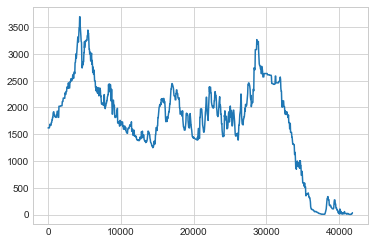

In [14]:
fig = plt.figure()
ax = plt.axes()
ax.plot(plot_x, plot_y);

<hr/>

# <u>Mapping and Thematic Analysis</u>

<hr/>

Start by selecting data about the states from the USA sample table provided with Spectrum Spatial.

In [15]:
query = "select State_Name, State, Fips_Code, Pop_1990, Pop_2000, MI_Centroid(OBJ) " \
    "from \"/Samples/NamedTables/USA\" " \
    "where State_Name LIKE 'N%'"
states = ftrService.query(query)

In [16]:
# Iterate through the individual features and properties to display some output
features = states["features"]
for i in range(len(features)):
    properties = features[i]["properties"]
    print (properties["State_Name"], end='')
    print ("\t", end='')
    print (properties["State"], end='')
    print ("\t", end='')
    print (properties["Fips_Code"], end='')
    print ("\t", end='')
    print (str(properties["Pop_1990"]), end='')
    print ("\t", end='')
    print (str(properties["Pop_2000"]), end='')
    print ("\t", end='')
    print (str(features[i]["geometry"]['coordinates'][0]), end='')
    print (",", end='')
    print (str(features[i]["geometry"]['coordinates'][1]), end='')
    print ("")

Nebraska	NE	31	1578385.0	1711263.0	-99.680521,41.50087
Nevada	NV	32	1201833.0	1998257.0	-117.021761,38.502190999999996
New Hampshire	NH	33	1109252.0	1235786.0	-71.63089099999999,44.001070999999996
New Jersey	NJ	34	7730188.0	8414350.0	-74.7271,40.142868
New Mexico	NM	35	1515069.0	1819046.0	-106.02552,34.16617
New York	NY	36	17990455.0	18976457.0	-76.502057,42.856215999999996
North Carolina	NC	37	6628637.0	8049313.0	-80.018692,35.213817
North Dakota	ND	38	638800.0	642200.0	-100.30129099999999,47.46788


##### Display query results using Leaflet (embedded within this notebook)
The ipyleaflet package enables a leaflet map to be embedded directly within a Jupyter notebook (or python session). The map is interactive and allows for the ability to insert a feature collection (GeoJSON).

In [17]:
import ipyleaflet

In [18]:
center = [38.992415, -95.147358]
zoom = 4
m = ipyleaflet.Map(center=center, zoom=zoom)
# Creating the map does not display it in the notebook's output. To do that, simply 
# output it by entering the variable (m) on a line by itself. The line below is commented 
# out since we haven't added our query results to the map yet so we'll wait to display it
# in a few cells
#m

In [19]:
# Reissue the states query to include the full geometry which was truncated above to minimize the output.
query = "select State_Name, State, Fips_Code, Pop_1990, Pop_2000, OBJ " \
    "from \"/Samples/NamedTables/USA\" " \
    "where State_Name LIKE 'N%'"
states = ftrService.query(query)


In [20]:
# Create the output layer for our query results and add the layer to the map
states_layer=ipyleaflet.GeoJSON(data=states)
m.add_layer(states_layer)

Display the map! Note this is an interactive map embedded directly into the notebook. Later steps below will update the map shown here.

In [21]:
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

The map should look like this<br/>
<IMG src="images\States_starting_with_N.png"/>

##### Style and Thematics
The features added to the map used a default leaflet style. Many analytic use cases will want to apply color and other styling to the features to visually represent the data results. The Thematics Service in the Spectrum python package assist with this process. Currently it only works with Individual Value themes.

### Thematics Service
The <code>Thematics</code> service exposes a set of utility methods for creating and persisting thematics. It does not correspond directly to a LIM service. The methods exposed are:

  * apply_indiv_value_theme(data, theme_property, indiv_value_theme_buckets) : Applies styles to a geojson feature collection. <code>data</code> supplies the feature collection, <code>theme_property</code> identifies the property on the features in <code>data</code> that is used to look up the style, and <code>indiv_value_theme_buckets</code> contains an array of 2-member arrays containing values in the <code>theme_property</code> property and a style object.
  * generate_range_theme_buckets(data_series, n_bins, start_color, end_color) : splits a data series into a specified number of bins and spreads colors for each bin from `start_color` to `end_color`. See below in this notebook for a detailed example.
  * convert_to_indiv_value(data, theme_property, ranges, lookup_table, stroke_color, stroke_weight, fill_opacity, all_others_fill_color) : Converts a range theme to an individual value theme on a feature collection. See below in this notebook for a detailed example.
  * write_indiv_value_theme(path, layer_name, table_name, theme_property, value_map) : Converts the theme into a NamedLayer definition and uses the <code>NamedResourceService</code> to write the new layer definition into the Spectrum Spatial repository.
  * write_map(map_path, map_name, layers, center, zoom=10000, zoomUnit="mi") : Creates a NamedMap definition and writes it into the Spectrum Spatial repository. Typically used with thematic layers created from <code>write_indiv_value_theme</code>
    
### Named Resource Service
This service corresponds to the <a href="http://support.pb.com/help/spectrum/18.2/en/webhelp/Spatial/index.html#Spatial/source/Services/namedresource/introduction/chapter.html">NamedResourceService</a>. Methods exposed currently are:

  * listNamedResources(path) : Lists the named resosurces at this server within the specified path. Use '/' for the root to return all resources.
  * does_exist(path, name) : Indicates True/False if the specified named resource exists.
  * upsert(path, name, sz_resource) : Inserts or updates the named resource with the specified contents.

Below is a hardcoded Individual Value theme mapping values of the State column to style objects that leaflet will read. The style objects correspond to the geoJson.setStyle properties found in [the Leaflet Documentation](http://leafletjs.com/reference-1.2.0.html).

In [22]:
thematicsService = mySpectrumSpatial.Thematics()

In [23]:
ivTheme= [
    ['NE', {'color': 'white', 'fillColor': '#f00000', 'fillOpacity': 0.5, 'weight': 1}],
    ['NV', {'color': 'white', 'fillColor': '#ea4e00', 'fillOpacity': 0.5, 'weight': 1}],
    ['NH', {'color': 'white', 'fillColor': '#bfbf00', 'fillOpacity': 0.5, 'weight': 1}],
    ['NJ', {'color': 'white', 'fillColor': '#d58e00', 'fillOpacity': 0.5, 'weight': 1}],
    ['NM', {'color': 'white', 'fillColor': '#d58e00', 'fillOpacity': 0.5, 'weight': 1}],
    ['NY', {'color': 'white', 'fillColor': '#72aa00', 'fillOpacity': 0.5, 'weight': 1}],
    ['NC', {'color': 'white', 'fillColor': '#dc42f4', 'fillOpacity': 0.5, 'weight': 1}],
    ['ND', {'color': 'white', 'fillColor': '#329500', 'fillOpacity': 0.5, 'weight': 1}]
]

In [24]:
# Let's use the Thematics service to apply that Indiv Value theme to our feature collection and update the layer in our 
# leaflet map shown above.
thematicsService.apply_indiv_value_theme(states, 'State', ivTheme)
m.remove_layer(states_layer)
states_layer = ipyleaflet.GeoJSON(data=states)
m.add_layer(states_layer)

The leaflet map shown above should now look like this:<br/>
<IMG src="images\States_starting_with_N_themed.png"/>

##### Write Results, Map, and Theme to Spectrum Spatial
Often we may want to write our results to Spectrum Spatial so that they can be used in applications such as Spectrum Spatial Analyst. In this small demonstration example, we have a custom query with custom styling. The FeatureService class in our Spectrum python package includes a method for creating a NamedTable using a View and the Thematics class provides the ability to output a new map with an Individual value theme. The calls below will use these capabilities. The Spatial Manager can be used to visualize the newly created view table and map.

In [25]:
ftrService.createViewTable(query, "/Jupyter/NamedTables", "StatesQuery", ["/Samples/NamedTables/USA"])

In [26]:
thematicsService.write_indiv_value_theme(
    "/Jupyter/NamedLayers",             # Layer path (will be created if it does not exist)
    "StatesThemeLayer",                 # NamedLayer name
    "/Jupyter/NamedTables/StatesQuery", # NamedTable data source 
    "State", ivTheme)                   # Theme: Column name in datasource and value-to-color mapping

thematicsService.write_map(
    "/Jupyter/NamedMaps",               # Map path (will be created if it does not exist)
    "StatesThemeMap",                   # NamedMap name
    [                                   # NamedLayers in the map - array of 2-element arrays where 
        ["/Jupyter/NamedLayers",        #    first is NamedLayer's path
         "StatesThemeLayer"],           #    second is the NamedLayer's name
        ["/Samples/NamedLayers",
        "USALayer"]
    ],
    center, 2500, "mi")                 # Map view (center, zoom, and zoom unit)

If you now go check your Spatial Manager application, in the folder <code>/Jupyter/NamedMaps</code> should be a map named <code>StatesThemeMap</code> and should look like this:<br/>
<IMG src="images/States_themed_by_hiway_len_LIM.png"/>

### Spatial Data Science using Pandas and GeoPandas
Pandas is a Python package that is very popular amongst data scientists. It organizes data into Series and DataFrame object types (essentially 1D and 2D, respectively). GeoPandas is an extension to Pandas that adds support for Geometry as a data type. In this section of the notebook, we will produce a thematic map based on Pandas-based calculations.
<br/>
To keep the example simple, we want to theme the USA map based on the total length of highways that intersect each state in the US_HIWAY sample table.

In [27]:
# First we will ask Spectrum Spatial to relate the state boundaries and highways 
# together and compute the intersection lengths.
query = \
    'SELECT USA.State as State, '\
    '     MI_Length(MI_Intersection(USA.OBJ,US_HIWAY.OBJ),\'mi\',\'Spherical\') as len ' \
    'FROM "/Samples/NamedTables/USA" as USA, ' \
    '     "/Samples/NamedTables/US_HIWAY" as US_HIWAY ' \
    'WHERE USA.OBJ intersects US_HIWAY.OBJ'
ftrCollection = ftrService.query(query)
# The resulting feature collection has no geometry and two properties (State and len)

In [28]:
# The Spectrum python package's GeometryService provides a method to convert
# a GeoJSON feature collection into a GeoPandas GeoDataFrame object. We will do that
# so that we can then work with the data in this format
geoDataFrame = mySpectrumSpatial.GeometryOperations().GeoJSON2GeoDataFrame(ftrCollection)
geoDataFrame.head() # Outputs the top 5 records to the notebook to see what's going on

,State,len
0,AL,63.331702
1,AZ,390.301822
2,CA,239.078008
3,FL,360.017392
4,LA,272.916371


In [29]:
# Now that we have a DataFrame, we can manipulate it further using any Python
# commands desired. What we will do here is to aggregate the DataFrame based on the State
# property.
stateHiwayGroups = geoDataFrame.groupby("State") # Returns a DataFrameGroupBy object
stateHiwayLens = stateHiwayGroups["len"]         # Returns a SeriesGroupBy object
stateHiwayTotalDistance = stateHiwayLens.sum()   # Returns a Series object with the State values as the labels and the SUM(len) as the values
stateHiwayTotalDistance.head()

State
AL     863.453504
AR     514.167079
AZ    1158.319852
CA    2361.937791
CO     931.712126
Name: len, dtype: float64

In [30]:
# Now that we have a Pandas Series object which is a 1-D list of aggregate lengths of
# hiways that intersect a state and the label for each entry in the Series is the state code,
# the next step is to group these values into ranges (bins). This is done using the Thematics class
# which exposes a method named generate_range_theme_buckets using the Pandas qcut function
#   https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
stateHiwayRangeBins = thematicsService.generate_range_theme_buckets(
    stateHiwayTotalDistance, # Data Series
    3,                       # Number of Bins
    "green",                 # Start Color (least miles of highways)
    "red")                   # End Color   (most miles of highways)
# Display the contents of the bins which is simply an array of pairs in which the first value
# is the value and the second value is a color. Notice the color of the last 2 entires is the same.
# In this example, we asked for 3 bins and the list has 4 entries but only 3 colors. The first entry
# is the min value of the data while the last enty is the max data value. 
for bucket, color in stateHiwayRangeBins:
    print(bucket, end='')
    print(' = ', end='')
    print (color.get_hex(), end='')
    print ("")

9.102988989997751 = #008000
628.9037002938525 = #bfbf00
945.1694169454437 = #f00
3052.490097833472 = #f00


In [31]:
# To use this in Leaflet, we will assign the color to each feature based on which bin
# it resides in. This is done through a helper function on the Thematics class in the
# Spectrum python package named convert_to_indiv_value()
#
# First we need the states data (so far all we have read in was based on states with names
# beginning with N but here we want to display all states in our map)
states = ftrService.query('SELECT State,OBJ FROM "/Samples/NamedTables/USA"')
# Now that we have our full set of state objects, 
ivTheme = thematicsService.convert_to_indiv_value(
    states,                # Feature Collection 
    'State',               # Theme expression column in the Feature Collection that serves as the
                           # Series label in the data Series lookup table (below)
    stateHiwayRangeBins,   # Bin data - mapping of ranges to colors
    stateHiwayTotalDistance, # Series that correlates feature expressions (State codes in this example)
                           # to data values (sum of lengths of hiways in that state in this example)
    'white', 1, 0.50, 'white') # Default color properties if not found in the bins

In [32]:
# Like we did earlier, we can now apply this individual value theme (which is a 2-D mapping
# of features identified by a value - State in this case - to a color) to the actual dataset.
# Note we could have done that as part of the above call and maybe should. But this function also
# supports actual individual value use cases like earlier so we're just using it again here)
thematicsService.apply_indiv_value_theme(states, 'State', ivTheme)

In [33]:
# Finally remove and readd our layer in the map - you will need to scroll your notebook
# up after this runs to see the result.
m.remove_layer(states_layer)
states_layer = ipyleaflet.GeoJSON(data=states)
m.add_layer(states_layer)

The leaflet map embedded in the notebook above should now look like this:<br/>
<IMG src="images/States_themed_by_hiway_len.png"/>
<p>The resulting map shows states shaded as red, yellow, or green based on the total miles of highways from the US_HIWAY file that run through it. This analysis is a bit unfair since very small states like Rhode Island or Connecticut would always have smaller totals that very large states like Texas or California. What may make a better analytic result would be to divide the milage by the area of the state and re-compute the thematic. This next cell does all of that in one cell since we've already seen all of these samples.</p>

In [34]:
query = \
    'SELECT State, '\
    '     MI_Area(OBJ,\'sq mi\',\'Spherical\') as Area ' \
    'FROM "/Samples/NamedTables/USA" as USA '
areas = ftrService.query(query)
stateAreas = mySpectrumSpatial.GeometryOperations().GeoJSON2GeoDataFrame(areas).groupby("State")["Area"].sum()
stateHiwayDistancePerSqMile = stateHiwayTotalDistance / stateAreas
stateHiwayRangeBins = thematicsService.generate_range_theme_buckets(
    stateHiwayDistancePerSqMile, 3,"green","red")
ivTheme = thematicsService.convert_to_indiv_value(
    states, 'State', stateHiwayRangeBins,
    stateHiwayDistancePerSqMile,'white', 1, 0.50, 'white') 
thematicsService.apply_indiv_value_theme(states, 'State', ivTheme)
m.remove_layer(states_layer)
states_layer = ipyleaflet.GeoJSON(data=states)
m.add_layer(states_layer)

In [35]:
# And finally let's write this Theme to Spectrum Spatial's repository as well.
thematicsService.write_indiv_value_theme(
    "/Jupyter/NamedLayers","StatesHighwayDensityLayer",
    "/Samples/NamedTables/USA","State", ivTheme)
thematicsService.write_map("/Jupyter/NamedMaps", "StatesHighwayDensityMap",
    [["/Jupyter/NamedLayers","StatesHighwayDensityLayer"]], center, 2500, "mi")

The leaflet map should now look like this:<br/>
<IMG src="images/States_themed_by_hiway_len_per_area.png"/>
<br/>
And in Spatial Manager should be a map named <code>StatesHighwayDensityMap</code> and should look like this:<br/>
<IMG src="images/States_themed_by_hiway_len_per_area_LIM.png"/>